# Analyze Region 1 - Alaska

This notebook analyzes the largest glaciers in Region 1 - Alaska

In [1]:
import os
import os.path as op
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import plotting_extent
from earthpy import clip as cl
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

# Show Region

In [2]:
# Set region number, region name, and region index
# Once these are set, this notebook should run automatically
# Note for the region index, region_index_1 should be one less than the region number and 
# region_index_2 should be equal to the region number. For example, for region 1, index_1 should be set to 0 and 
# index_2 should be set to 1
region_number = "1"
region_name = "Alaska"
region_index_1 = 0
region_index_2 = 1

In [3]:
# Open natural earth basemap TIF file
ne_fp = 'data/natural-earth/NE1_HR_LC_SR_W/NE1_HR_LC_SR_W.tif' # 10 m res
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds
    ne_raster_meta = ne_src.meta

In [4]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

# Extract Region outline
region_outline = glacier_regions[region_index_1:region_index_2]

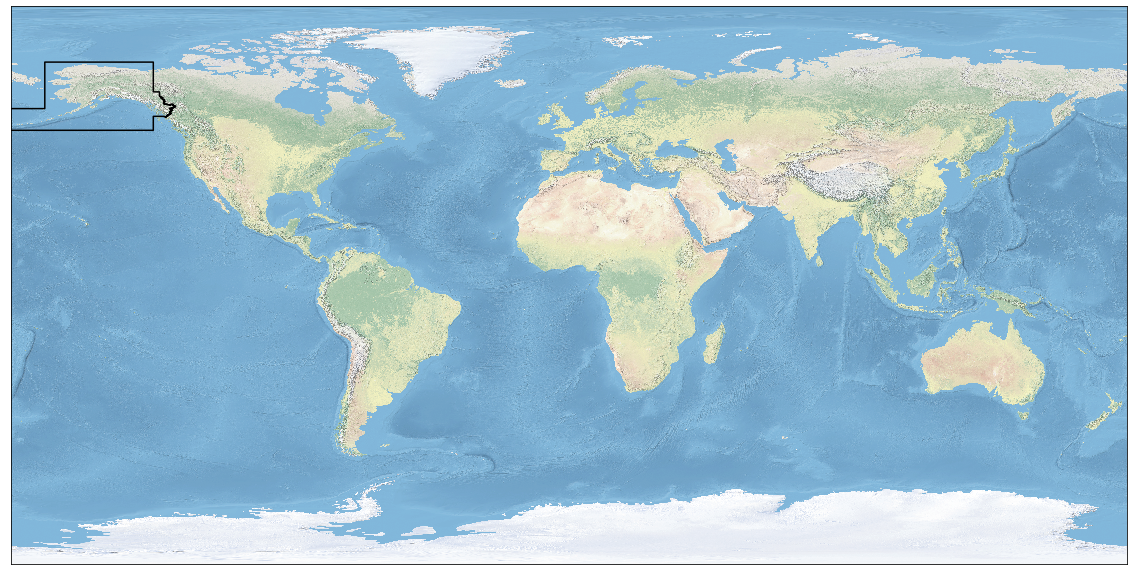

In [5]:
# Plot region outline over the natural earth
# Plot natural earth basemap
fig, ax = plt.subplots(figsize=(20, 20))

# Plot natural earth
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot region 7 outline
region_outline.boundary.plot(ax=ax, color="black")

plt.show()

# Glaciers

In [6]:
# Open GLIMS three largest glacier outlines for this region.
glims_glaciers_fn = "data/glims/processed/largest/glims_region_" + region_number + "_largest.shp"
glims_glaciers_df = gpd.read_file(glims_glaciers_fn)

In [7]:
glims_glaciers_df

,region_no,glac_id,area,db_area,width,length,primeclass,min_elev,mean_elev,max_elev,src_date,glac_name,geometry
0,1,G219787E60289N,3362.66,3362.66,0.0,0.0,0.0,6.0,0.0,5943.0,2010-09-12T00:00:00,Seward Glacier,"POLYGON Z ((-140.54114 60.609398 0, -140.54116..."
1,1,G217991E60521N,3025.11,3025.11,0.0,0.0,0.0,3.0,0.0,5381.0,2010-09-10T00:00:00,Bering Glacier,"POLYGON Z ((-140.875546 60.643679 0, -140.8743..."
2,1,G220740E60158N,2834.49,2834.49,0.0,0.0,0.0,0.0,0.0,5889.0,2010-09-14T00:00:00,Hubbard Glacier,"POLYGON Z ((-139.063473 60.304585 0, -139.0589..."


In [8]:
# Open RGI three largest glacier outlines for this region.
rgi_glaciers_fn = "data/rgi/processed/largest/rgi_region_" + region_number + "_largest.shp"
rgi_glaciers_df = gpd.read_file(rgi_glaciers_fn)

In [9]:
rgi_glaciers_df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-01.13696,G219572E60177N,20100912,-9999999,-140.428,60.177,1,5,3362.656,6,...,172,136989,0,0,0,0,9,9,Seward Glacier,"POLYGON ((-140.541140322 60.60939843700004, -1..."
1,RGI60-01.13635,G217928E60461N,20100910,-9999999,-142.072,60.461,1,5,3025.115,3,...,273,196819,0,0,0,2,9,9,Bering Glacier,"POLYGON ((-140.875545776 60.64367927900008, -1..."
2,RGI60-01.14443,G220499E60427N,20100914,-9999999,-139.501,60.427,1,5,2834.493,0,...,151,131321,0,0,0,1,9,9,Hubbard Glacier,"POLYGON ((-139.06347255 60.30458540800004, -13..."


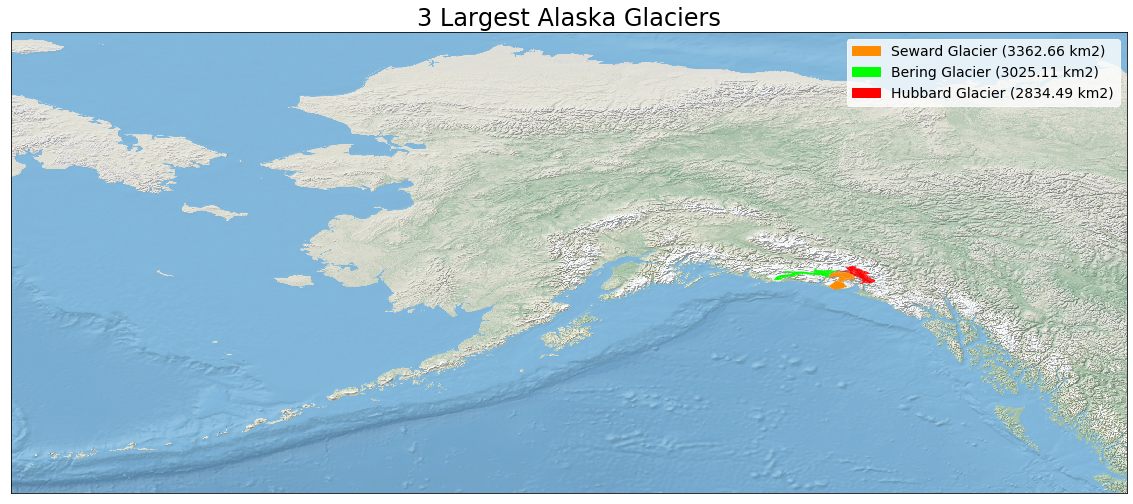

In [10]:
# Plot 3 largest glaciers on natural earth from GLIMS
# Set up legend. Note that the sizes come from an average of GLIMS and RGI. 
# See wgms-glacier-project/data/comparison/compare-glims-rgi.xlsx
legend_colors = ['darkorange', 'lime', 'red']
legend_labels = [glims_glaciers_df['glac_name'][0] + ' (' + str(glims_glaciers_df['area'][0]) + ' km2)',
                 glims_glaciers_df['glac_name'][1] + ' (' + str(glims_glaciers_df['area'][1]) + ' km2)',
                 glims_glaciers_df['glac_name'][2] + ' (' + str(glims_glaciers_df['area'][2]) + ' km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_outline.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
glims_glaciers_df.iloc[0:1].plot(ax=ax, color='darkorange')
glims_glaciers_df.iloc[1:2].plot(ax=ax, color='lime')
glims_glaciers_df.iloc[2:3].plot(ax=ax, color='red')
ax.set_title('3 Largest ' + region_name + ' Glaciers', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (1.0,1.0))

plt.show()

### Create final data files

In [11]:
# Drop columns that are not needed for the final data (use GLIMS dataframe for this)
final_data_df = glims_glaciers_df.drop(['db_area', 'width', 'length', 'primeclass', 
                                                          'min_elev', 'mean_elev', 'max_elev'], axis=1)

# Add region_name column
final_data_df['reg_name'] = region_name

# Reorder the columns of the dataframe
final_data_df = final_data_df[['region_no', 'reg_name', 'glac_name', 'glac_id', 
                                                 'area', 'src_date', 'geometry']]

# Rename columns
final_data_df.rename(columns={'glac_id': 'glims_id', 'area': 'area_km2', 
                                       'src_date': 'date'}, inplace=True)

In [12]:
final_data_df

,region_no,reg_name,glac_name,glims_id,area_km2,date,geometry
0,1,Alaska,Seward Glacier,G219787E60289N,3362.66,2010-09-12T00:00:00,"POLYGON Z ((-140.54114 60.609398 0, -140.54116..."
1,1,Alaska,Bering Glacier,G217991E60521N,3025.11,2010-09-10T00:00:00,"POLYGON Z ((-140.875546 60.643679 0, -140.8743..."
2,1,Alaska,Hubbard Glacier,G220740E60158N,2834.49,2010-09-14T00:00:00,"POLYGON Z ((-139.063473 60.304585 0, -139.0589..."


In [13]:
# Calculate area and update dataframe as neccessary and clean the date format in the date column
# If GLIMS and RGI dates are equal, then average the two areas.
# If GLIMS date is more recent, then use that average.
# If RGI date is more recent, then use that average. (Note I don't think this ever happens)
for x in range(3):
    # Exract and clean GLIMS date so that it is comparable to RGI date
    glims_date = glims_glaciers_df['src_date'][x][0:10].replace('-', '')
    #print('glims date: ' + glims_date)
    
    # Extract RGI date
    rgi_date = rgi_glaciers_df['BgnDate'][x]
    #print('rgi date:   ' + rgi_date)
    
    if glims_date == rgi_date:
        # Average GLIMS and RGI areas
        area = np.average([glims_glaciers_df['area'][x], rgi_glaciers_df['Area'][x]])
        print('Averaging area: ' + str(area))
    elif glims_date > rgi_date:
        # Use GLIMS area for the area
        area = glims_glaciers_df['area'][x]
        print('Using GLIMS area' + str(area))
    elif rgi_date > glims_date:
        # Use RGI area for the area
        area = rgi_glaciers_df['Area'][x]
        print('Using RGI area' + str(area))
    else:
        print("Error. Area could not be calculated.")
    
    # Set the area in the final dataframe
    final_data_df.iloc[x, final_data_df.columns.get_loc('area_km2')] = area
    
    # Clean the date format in the final dataframe
    final_data_df.iloc[x, final_data_df.columns.get_loc('date')] = glims_glaciers_df['src_date'][x][0:10]

Averaging area: 3362.658
Averaging area: 3025.1125
Averaging area: 2834.4915


In [14]:
final_data_df

,region_no,reg_name,glac_name,glims_id,area_km2,date,geometry
0,1,Alaska,Seward Glacier,G219787E60289N,3362.6580,2010-09-12,"POLYGON Z ((-140.54114 60.609398 0, -140.54116..."
1,1,Alaska,Bering Glacier,G217991E60521N,3025.1125,2010-09-10,"POLYGON Z ((-140.875546 60.643679 0, -140.8743..."
2,1,Alaska,Hubbard Glacier,G220740E60158N,2834.4915,2010-09-14,"POLYGON Z ((-139.063473 60.304585 0, -139.0589..."


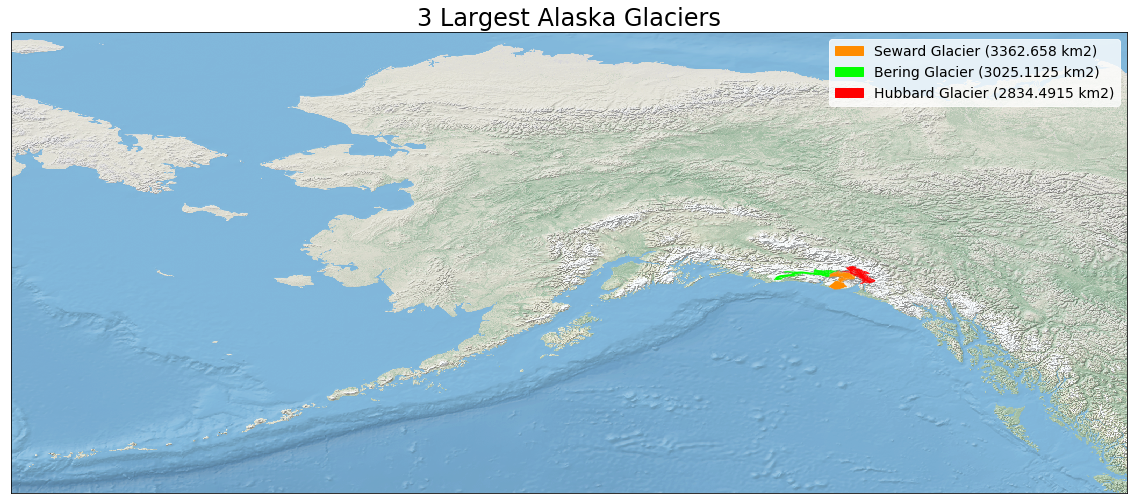

In [16]:
# Check that the geodataframe wasn't corrupted from these changes by plotting the data
# Plot 3 largest glaciers on natural earth from GLIMS
# Set up legend. Note that the sizes come from an average of GLIMS and RGI. 
# See wgms-glacier-project/data/comparison/compare-glims-rgi.xlsx
legend_colors = ['darkorange', 'lime', 'red']
legend_labels = [final_data_df['glac_name'][0] + ' (' + str(final_data_df['area_km2'][0]) + ' km2)',
                 final_data_df['glac_name'][1] + ' (' + str(final_data_df['area_km2'][1]) + ' km2)',
                 final_data_df['glac_name'][2] + ' (' + str(final_data_df['area_km2'][2]) + ' km2)']
legend_patches = [Patch(color=icolor, label=label)
                  for icolor, label in zip(legend_colors, legend_labels)]

# Set up plot space
fig, ax = plt.subplots(figsize=(20,20))
minx, miny, maxx, maxy = region_outline.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 3 largest glaciers from glims dataframe
final_data_df.iloc[0:1].plot(ax=ax, color='darkorange')
final_data_df.iloc[1:2].plot(ax=ax, color='lime')
final_data_df.iloc[2:3].plot(ax=ax, color='red')
ax.set_title('3 Largest ' + region_name + ' Glaciers', fontsize=24)
# Plot legend
ax.legend(handles=legend_patches,
         facecolor ="white",
         edgecolor = "white",
         fontsize = 14,
         bbox_to_anchor = (1.0,1.0))

plt.show()

In [17]:
# Write dataframe to shapefile
final_data_fn = "data/final-dataset/region-" + region_number + "-largest-glaciers.shp"
if os.path.exists(final_data_fn) == False:
    final_data_df.to_file(driver='ESRI Shapefile', filename=final_data_fn)
    print("Saving data file: " + final_data_fn)
else:
    print(final_data_fn + " already extists")

Saving data file: data/final-dataset/region-1-largest-glaciers.shp


In [18]:
# Save shapefile to zipfile
zipfile_fn = ws.zipshp(final_data_fn, Delete=True)
zipfile_fn

'data/final-dataset\\region-1-largest-glaciers.zip'